In [2]:
import numpy as np
import pandas as pd
from plotnine import *

In [155]:
df = pd.read_csv('data/sst_of_scotland.csv')
array = np.array(df['sst'])
array

array([7.954714 , 8.199177 , 7.6553307, ..., 7.7854586, 7.357517 ,
       6.598882 ])

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# result = seasonal_decompose(df['sst'], model='additive', freq=12)
result = STL(array, period=12).fit()
df = pd.DataFrame({
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

time_list = np.linspace(1854, 2018, len(df))
df = pd.concat([df, pd.DataFrame(time_list, columns=['time'])], axis=1)
df.to_csv('data/sst_after_decomposed.csv', index=None)

In [157]:
df_list = []

begin_time_list = [1900, 1960, 1998, 2013]
for begin_time in begin_time_list:
    df_temp = df[df['time']>begin_time]
    df_temp['begin_time'] = begin_time
    df_list.append(df_temp)

df2 = pd.concat(df_list)


(
    ggplot(df2)
    + geom_line(aes('time','trend', color='trend'),
                show_legend=False)
    + geom_line(aes('time','seasonal', color='seasonal'),
                show_legend=False)
    + geom_point(aes('time','resid', color='resid'),
                 size=.5,
                 show_legend=False)
    + facet_wrap('begin_time', scales='free')
    + labs(x='Year',
           y='',
           title='Decomposed SST Changes in Scotland',
           color='')
).save('img/sst/decomposed sst changes in scotland.png')

<ipython-input-157-575cfa19cc1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-157-575cfa19cc1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-157-575cfa19cc1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-157-575cfa19c

In [158]:
(
    ggplot(df[df['time']>=1900], aes('time','trend', color='trend'))
    + geom_line()
    + geom_vline(aes(xintercept=1932.6), color='red', size=2)
    + geom_vline(aes(xintercept=1979.5), color='blue', size=2)
    + geom_vline(aes(xintercept=1999.7), color='red', size=2)
    + geom_segment(x=1900, y=6.1, xend=1930, yend=5.7,
                   color='blue', size=.1,
                   arrow=arrow())
    + geom_segment(x=1936, y=5.7, xend=1975, yend=6.6,
                   color='red', size=.1,
                   arrow=arrow())
    + geom_segment(x=1982, y=6.6, xend=1997, yend=5.9,
                   color='blue', size=.1,
                   arrow=arrow())
    + geom_segment(x=2002, y=5.9, xend=2018, yend=6.7,
                   color='red', size=.1,
                   arrow=arrow())
    + labs(x='Year',
           y='Trend of SST',
           title='Trend Series of SST Changes in Scotland',
           color='Trend of SST')
).save('img/sst/trend series of sst changes in scotland.png')

c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: img/sst/trend series of sst changes in scotland.png


In [159]:
df_after_1999 = df[df['time']>=1999]
df_after_1999['diff'] = 0
df_list = [df_after_1999]
for i in range(5):
    df_temp = df_list[-1].copy()
    df_temp['trend'] = df_temp['trend'].diff()
    df_temp['diff'] = i + 1
    df_list.append(df_temp)

<ipython-input-159-2d038468fbfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [160]:
df_temp = pd.concat(df_list)
df_temp

,trend,seasonal,resid,time,diff
1744,5.882668,-0.148617,-0.130974,1999.038540,0
1745,5.879278,-0.699477,-0.114249,1999.121704,0
1746,5.872023,-0.922982,0.024616,1999.204868,0
1747,5.862037,-1.194117,0.061089,1999.288032,0
1748,5.850895,-1.116883,-0.057645,1999.371197,0
...,...,...,...,...,...
1968,-0.000117,1.460959,-0.181374,2017.667343,5
1969,-0.000031,1.842102,-0.178426,2017.750507,5
1970,-0.000037,1.406731,-0.019582,2017.833671,5
1971,-0.000043,0.733769,0.226391,2017.916836,5


In [161]:
var_list = []
for df in df_list:
    var_list.append(np.var(df['trend']))
var_list

[0.04099963664215694,
 0.0004600730162189924,
 2.112886720630772e-05,
 4.110007096544802e-06,
 2.9149267711679735e-06,
 5.2963089093346e-06]

In [162]:
(
    ggplot()
    + geom_line(df_temp, aes('time', 'trend', color='trend'),
                show_legend=False)
    + facet_wrap('diff', scales='free', ncol=1)
    + labs(x='Year', y='Trend of SST', color='',
           title='Trend Variation of SST under Different Differences')
).save('img/sst/trend under diff.png')

c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: img/sst/trend under diff.png
c:\environment\python3.8.5\lib\site-packages\plotnine\facets\facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


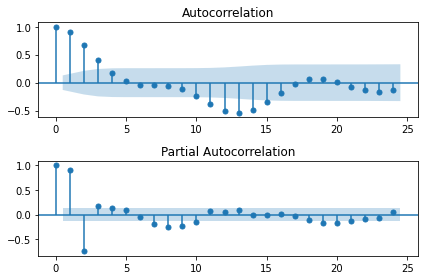

In [170]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

df_temp = pd.read_csv('data/sst_after_decomposed.csv')
df_temp = df_temp[df_temp['time']>=1999]
trend_series = df_temp['trend']
trend_series_diff = trend_series.diff(1)
trend_series_diff = trend_series_diff.diff(1)
trend_series_diff = trend_series_diff.dropna()
trend_series_diff = np.array(trend_series_diff)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

plot_acf(trend_series_diff, ax=ax1)
plot_pacf(trend_series_diff, ax=ax2)
plt.tight_layout()
plt.savefig('img/arima/acf and pacf of trend.png')

In [192]:
trend_series

1744    5.882668
1745    5.879278
1746    5.872023
1747    5.862037
1748    5.850895
          ...   
1968    6.402800
1969    6.400219
1970    6.398309
1971    6.397357
1972    6.397606
Name: trend, Length: 229, dtype: float64

In [193]:
model_traditional = ARIMA(trend_series, order=(2,2,0)).fit()
model_traditional.summary2()

c:\environment\python3.8.5\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
c:\environment\python3.8.5\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 -2330.8538
Dependent Variable: D2.trend         Log-Likelihood:      1176.3    
Date:               2021-01-29 12:14 Scale:               1.0000    
No. Observations:   227              Method:              css-mle   
Df Model:           3                Sample:              2         
Df Residuals:       224                                   9         
Converged:          1.0000           S.D. of innovations: 0.001     
No. Iterations:     17.0000          HQIC:                -2339.026 
AIC:                -2344.5536                                      
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const           -0.0000    0.0005   -0.0157  0.9875  -0.0011   0.0010
ar.L1.D2.trend   1.5576    0.0449   34.6845  0.0000   1.4696   1.6457
ar.L2.D2.trend  -0.7252    0.0448  -16.1743  0.0000  -0.8131  -0.6373
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.0740            -0.4749           1.1743            -0.0663
AR.2            1.0740             0.4749           1.1743             0.0663
====================================================================

"""

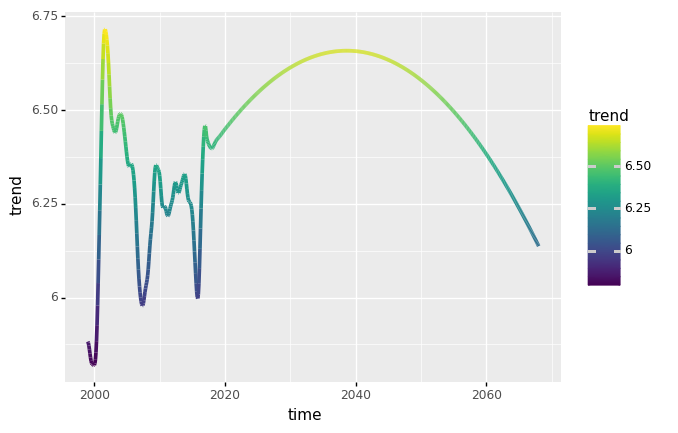

<ggplot: (83071523822)>

In [194]:
df = pd.DataFrame(np.concatenate([trend_series, model_traditional.forecast(50*12)[0]]), columns=['trend'])
time_array = np.linspace(1999, 2018+50, len(df))
df = pd.concat([df, pd.DataFrame(time_array, columns=['time'])], axis=1)

(
    ggplot(df, aes('time', 'trend', color='trend'))
    + geom_line(size=1.5)
)

In [11]:
from pmdarima import auto_arima

sst_list = []
for start_year in [1854, 1900, 1960, 1999]:
    df_temp = pd.read_csv('data/sst_after_decomposed.csv')
    df_temp = df_temp[df_temp['time']>=start_year]
    trend_series = df_temp['trend']

    model = auto_arima(trend_series,
                       start_p=1,
                       start_q=1,
                       d=2,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       information_criterion='bic',
                       seasonal=False)

    sst, _ = model.predict(n_periods=12 * 50, return_conf_int=True)
    sst_list.append(sst)
sst_list

Performing stepwise search to minimize bic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=nan sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : BIC=-15113.156, Time=0.32 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : BIC=-18425.360, Time=1.19 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : BIC=-17424.771, Time=2.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : BIC=-15120.742, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : BIC=-20375.588, Time=0.85 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : BIC=-20525.437, Time=2.01 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : BIC=-20553.154, Time=4.55 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : BIC=-20550.722, Time=2.13 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : BIC=-20485.623, Time=3.03 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : BIC=-20383.952, Time=2.68 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : BIC=-20484.319, Time=2.35 sec
 ARIMA(4,2,0)(0,0,0)[0]             : BIC=-20560.737, Time=1.97 sec
 ARIMA(3,2,0)(0,0,0)[0]             : BIC=-20533.021, Time=0.75 sec
 ARIMA(5,2,0)

[array([6.39907008, 6.40154998, 6.40471801, 6.40823142, 6.41182069,
        6.41533221, 6.41872477, 6.42203516, 6.42533325, 6.42868343,
        6.43212229, 6.43565347, 6.43925555, 6.44289575, 6.44654309,
        6.45017683, 6.45378902, 6.45738236, 6.46096545, 6.46454786,
        6.46813662, 6.47173469, 6.47534133, 6.47895349, 6.48256752,
        6.48618048, 6.48979082, 6.49339841, 6.49700405, 6.50060892,
        6.50421408, 6.50782014, 6.51142724, 6.51503515, 6.51864346,
        6.52225178, 6.52585985, 6.52946757, 6.533075  , 6.53668226,
        6.54028949, 6.5438968 , 6.54750422, 6.55111176, 6.55471936,
        6.55832699, 6.5619346 , 6.56554217, 6.56914971, 6.57275721,
        6.57636471, 6.5799722 , 6.58357971, 6.58718724, 6.59079477,
        6.59440231, 6.59800985, 6.60161739, 6.60522492, 6.60883245,
        6.61243997, 6.61604749, 6.61965502, 6.62326255, 6.62687008,
        6.63047761, 6.63408513, 6.63769266, 6.64130019, 6.64490772,
        6.64851525, 6.65212278, 6.65573031, 6.65

In [25]:
pd.read_csv('data/sst_after_decomposed.csv')

,trend,seasonal,resid,time
0,6.404564,1.510582,0.039568,1854.000000
1,6.377094,1.762318,0.059766,1854.083164
2,6.350477,1.266709,0.038144,1854.166329
3,6.324808,0.716773,0.081107,1854.249493
4,6.300151,-0.180693,0.060576,1854.332657
...,...,...,...,...
1968,6.402800,1.460959,-0.181374,2017.667343
1969,6.400219,1.842102,-0.178426,2017.750507
1970,6.398309,1.406731,-0.019582,2017.833671
1971,6.397357,0.733769,0.226391,2017.916836


,trend,seasonal,resid,time
0,6.404564,1.510582,0.039568,1854.000000
1,6.377094,1.762318,0.059766,1854.083164
2,6.350477,1.266709,0.038144,1854.166329
3,6.324808,0.716773,0.081107,1854.249493
4,6.300151,-0.180693,0.060576,1854.332657
...,...,...,...,...
1968,6.402800,1.460959,-0.181374,2017.667343
1969,6.400219,1.842102,-0.178426,2017.750507
1970,6.398309,1.406731,-0.019582,2017.833671
1971,6.397357,0.733769,0.226391,2017.916836


In [35]:
df_list = []
year_list = [1854, 1900, 1960, 1999]
for index, sst in enumerate(sst_list):
    df_last = pd.read_csv('data/sst_after_decomposed.csv')
    df_last['sst'] = df_last['trend'] + df_last['seasonal']
    df_last['start_year'] = year_list[index]
    df_last = df_last[['sst','time','start_year']]
    df_last = df_last[df_last['time']>=year_list[index]]
    df_temp = pd.DataFrame({
        'sst': sst,
        'time': np.linspace(2018, 2068, len(sst)),
        'start_year': year_list[index],
    })
    df_list.append(pd.concat([df_last, df_temp]))
df_temp = pd.concat(df_list)
df_temp

,sst,time,start_year
0,7.915146,1854.000000,1854
1,8.139411,1854.083164,1854
2,7.617187,1854.166329,1854
3,7.041581,1854.249493,1854
4,6.119458,1854.332657,1854
...,...,...,...
595,7.626881,2067.666110,1999
596,7.628936,2067.749583,1999
597,7.630992,2067.833055,1999
598,7.633048,2067.916528,1999


In [38]:
(
    ggplot(df_temp, aes('time', 'sst', color='sst'))
    + geom_line()
    + facet_wrap('start_year', scales='free')
    + labs(x='Year',
           y='Trend of SST',
           title='the SST Trend Forecast Value of ARIMA over the Next 50 Years',
           color='Trend')
).save('img/arima/the sst trend forecast value of arima over the next 50 years.png')

c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: img/arima/the sst trend forecast value of arima over the next 50 years.png
c:\environment\python3.8.5\lib\site-packages\plotnine\facets\facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
c:\environment\python3.8.5\lib\site-packages\plotnine\facets\facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


In [66]:
df_temp = pd.DataFrame({
    'p': [0, 0, 1, 1, 2, 2, 3, 3],
    'q': [0, 1, 0, 1, 0, 1, 0, 1],
    'bic': [-1793.999, -2039.354, -2164.991, -2273.488,
            -2336.842, -2327.749, -2334.389, -2318.646],
})

(
    ggplot(df_temp, aes('p', 'q', fill='bic'))
    + geom_tile(color='black')
    + scale_fill_gradient(low='purple', high='red')
    + geom_text(aes(label='bic'), size=12)
    + theme(                                         # new
    axis_ticks=element_blank(),
    panel_background=element_rect(fill='white'))
    + labs(x='P', y='Q',
           title='BIC under Different P and Q',
           color='BIC')
).save('img/arima/bic.png')


c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\environment\python3.8.5\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: img/arima/bic.png
